<a href="https://colab.research.google.com/github/OSGeoLabBp/tutorials/blob/master/hungarian/machine_learning/lessons/regilarization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regularizáció

L1 vagy lasszó regresszió. (LASSO = Least Absolute Shrinkage anf Selected Operator)

$Költség függvény = {1 \over n} \sum_{i=1}^{n}(y_{i} - y'_i)^{2} + \alpha \sum_{i=1}^{n} |w_i|$

L2 vagy gerinc regresszió. (Ridge regression)

$Költség függvény = {1 \over n} \sum_{i=1}^{n}(y_{i} - y'_i)^{2} + \alpha \sum_{i=1}^{n} w_i^2$

L1 regularizáció scikit learn könyvtárral

In [55]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Generate 100 sample data X(100,5), y(100)
X, y = make_regression(n_samples=100, n_features=5, noise=0.1) #, random_state=42)
# split data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) #, random_state=42)

# train modell
lasso = Lasso(alpha=0.1)
lf = lasso.fit(X_train, y_train)

# check for test data
y_pred = lasso.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

print("Coefficients:", lasso.coef_)

Mean Squared Error: 0.0738823790431925
Coefficients: [49.80968512 48.51926055 81.49584474 91.91815904 59.79232066]


L1 és L2 regularizáció Kerassal

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from tensorflow.keras import Sequential, layers, regularizers

In [57]:
# Generate synthetic data
X, y = make_regression(n_samples=1000, n_features=5, noise=0.1, random_state=42)
epochs = 40

Build and fit model without regularization

In [59]:
model0 = Sequential([
    layers.Dense(1,
                 input_shape=(X.shape[1],),
                 use_bias=False)
])
model0.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01),
              loss="mse")

# Train and record loss history
history0 = model0.fit(X, y, epochs=epochs, batch_size=32, validation_split=0.2, verbose=0)


Build and fir model with L1 regularization

In [60]:
model1 = Sequential([
    layers.Dense(1,
                 input_shape=(X.shape[1],),
                 kernel_regularizer=regularizers.l1(0.1),  # L1 penalty
                 use_bias=False)
])

model1.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01),
              loss="mse")

# Train and record loss history
history1 = model1.fit(X, y, epochs=epochs, batch_size=32, validation_split=0.2, verbose=0)

Build and fit model with L2 regularization

In [61]:
# Build model: a single dense layer with L2 regularization (Ridge)
model2 = Sequential([
    layers.Dense(1,
                 input_shape=(X.shape[1],),
                 kernel_regularizer=regularizers.l2(0.1),  # L2 penalty
                 use_bias=False)
])

model2.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01),
              loss="mse")

# Train and record loss history
history2 = model2.fit(X, y, epochs=epochs, batch_size=32, validation_split=0.2, verbose=0)

Text(0.5, 1.0, 'Convergence')

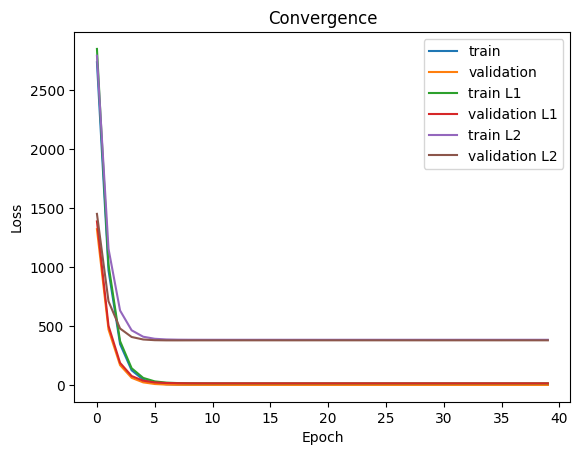

In [62]:
# Plot loss (objective function) vs epochs
plt.plot(history0.history["loss"], label="train")
plt.plot(history0.history["val_loss"], label="validation")
plt.plot(history1.history["loss"], label="train L1")
plt.plot(history1.history["val_loss"], label="validation L1")
plt.plot(history2.history["loss"], label="train L2")
plt.plot(history2.history["val_loss"], label="validation L2")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Convergence")